In [15]:
import csv
import numpy as np

label = []
i = 1
with open('winequality-red.csv') as f_red:
    red_reader = csv.reader(f_red)
    for row in red_reader:
        if i < 2:
            i += 1
            label.append(row)
        else:
            break
    data_red = np.loadtxt(f_red,delimiter = ",", skiprows = 1)
    


with open('winequality-white.csv') as f_white:
    data_white = np.loadtxt(f_white,delimiter = ",", skiprows = 1)
np.shape(data_red)
row_red = np.shape(data_red)[0]
row_white = np.shape(data_white)[0]
col = np.shape(data_red)[1]
data = np.zeros([row_red+row_white, col])
data[:row_red,] = data_red
data[row_red:,] = data_white
flag_red = []
for i in range(np.shape(data_red)[0]):
    flag_red.append(0)

The array 'data' is the combination of data for red wine and white wine.

In [11]:
np.shape(data_white)
flag_white = []
for i in range(np.shape(data_white)[0]):
    flag_white.append(1)
flag = flag_red + flag_white
flag = np.array(flag)

The flag 0 is red wine and the flag 1 is white wine

[0]	train-auc:0.967425
[1]	train-auc:0.982715
[2]	train-auc:0.992875
[3]	train-auc:0.995697
[4]	train-auc:0.995492
[5]	train-auc:0.996115
[6]	train-auc:0.996566
[7]	train-auc:0.996712
[8]	train-auc:0.996686
[9]	train-auc:0.996636
[10]	train-auc:0.996755
[11]	train-auc:0.996761
[12]	train-auc:0.996776
[13]	train-auc:0.996816
[14]	train-auc:0.99675
[15]	train-auc:0.997067
[16]	train-auc:0.997026
[17]	train-auc:0.997058
[18]	train-auc:0.997031
[19]	train-auc:0.997095
[20]	train-auc:0.997101
[21]	train-auc:0.997122
[22]	train-auc:0.997114
[23]	train-auc:0.997148
[24]	train-auc:0.997153
[25]	train-auc:0.997129
[26]	train-auc:0.997111
[27]	train-auc:0.997105
[28]	train-auc:0.997084
[29]	train-auc:0.997052
[30]	train-auc:0.997058
[31]	train-auc:0.997116
[32]	train-auc:0.997088
[33]	train-auc:0.997086
[34]	train-auc:0.997111
[35]	train-auc:0.997118
[36]	train-auc:0.997106
[37]	train-auc:0.9971
[38]	train-auc:0.997113
[39]	train-auc:0.997119
[40]	train-auc:0.997191
[41]	train-auc:0.997167
[42]	

/Users/chenhaofeng/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


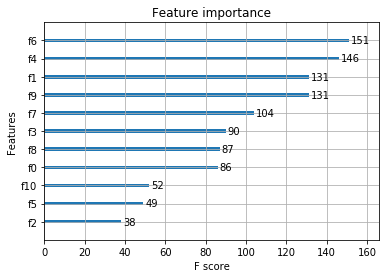

In [12]:
#X is features and y is flag
X = data[: ,:11]
y = flag

# Establish train and test sample
from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=0)

import xgboost as xgb
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x)
 
#booster:
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth':7,
        'lambda':15,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':1,
        'eta': 0.025,
        'seed':0,
        'nthread':8,
        'silent':1,
        'gamma':0.15,
        'learning_rate' : 0.01}
 
watchlist = [(dtrain,'train')]
 

bst=xgb.train(params,dtrain,num_boost_round=50,evals=watchlist)
ypred=bst.predict(dtest)
 

y_pred = (ypred >= 0.5)*1
from sklearn import metrics
print ('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))
print ('ACC: %.4f' % metrics.accuracy_score(test_y,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred))
print ('Precesion: %.4f' %metrics.precision_score(test_y,y_pred))
metrics.confusion_matrix(test_y,y_pred)
 
 
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  
xgb.plot_importance(bst)



In [20]:
label = label[-1]
print(label)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


The label is the features used for classification

Use XGBoost method to train a classifier for red wine and white wine. WIthout adjusting parameters. It could get a percision 99% for test data. And form the importance plot we could find that the 5 important variable for classification is total_sulfur_dioxide, chlorides, volatile_acidity, sulphates and density.